<a href="https://colab.research.google.com/github/aakhterov/ML_tools/blob/master/nltk_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit

In [ ]:
# TODO
# 1. Exercises
# 2. Add comments

https://www.nltk.org/book/

In [ ]:
import nltk, re, pprint
import nltk.data
from string import punctuation
from nltk.corpus import (gutenberg, webtext, nps_chat, brown, reuters, stopwords,
                         udhr, PlaintextCorpusReader, words, names, wordnet)
from nltk.util import ngrams
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize, stanford
from nltk.tbl import demo as brill_demo
from urllib import request
from collections import defaultdict
from bs4 import BeautifulSoup
nltk.download('punkt')
nltk.download('book')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/d

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1. Language Processing and Python**

In [ ]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
text4[:10] # Let's look at this object

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House']

In [ ]:
len(text4) # Total number of tokens. Equivalent to len(text4.tokens)

152901

In [ ]:
len(set(text4)) # Vocabulary.  Equivalent to len(text4.vocab())

10025

In [ ]:
len(set(text4)) / len(text4) # Let's calculate lexical diversity

0.06556530042314962

In [ ]:
text4.count('America') # Number of times the word "America" occurs in the text4

240

In [ ]:
text4.concordance("democracy") # Let's look at context of the word "democracy"

Displaying 25 of 71 matches:
ther a confederated representative democracy were a government competent to the
sions of government but to that of democracy . If such is its theory , those wh
r ideas of a simple representative democracy or republic , and knowing the tend
 of their country . In the name of democracy they speak , warning the people ag
unusual professions of devotion to democracy . The foregoing remarks relate alm
 unshaken temple of representative democracy , to be not only an inspiration an
 reflects the glory of new - world democracy , but in the new order of finance 
he righteousness of representative democracy , where our freedom never has made
 with the ideals of representative democracy , when one portion of our citizens
TY RESPONSIBILITIES In our form of democracy the expression of the popular will
t distrust the future of essential democracy . The people of the United States 
mes require , without yielding its democracy . Our tasks in the last four years
 the last f

In [ ]:
text4.similar("democracy") # Let's look at words similar to the word "democracy" (similarity is based on context)

people government country nation peace america war children time all
duty hope congress faith man responsibility life which it world


In [ ]:
fdist4 = FreqDist(text4) # Words distribution
fdist4.most_common(10)

[('the', 9555),
 (',', 7275),
 ('of', 7169),
 ('and', 5226),
 ('.', 5011),
 ('to', 4477),
 ('in', 2604),
 ('a', 2229),
 ('our', 2062),
 ('that', 1769)]

In [ ]:
fdist4['America'] # Equivalent to text4.count('America')

240

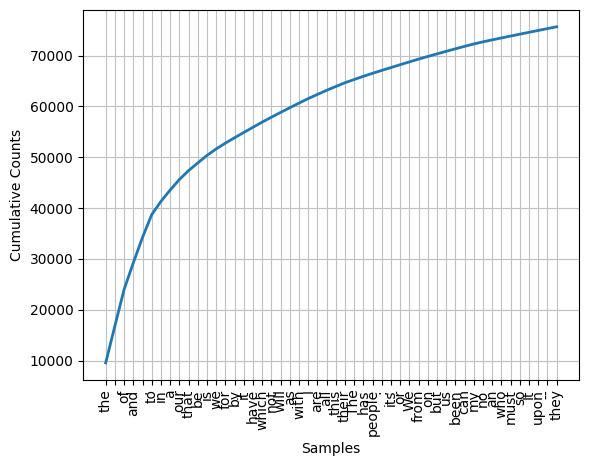

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [ ]:
fdist4.plot(50, cumulative=True)

In [ ]:
len([w for w in set(text4) if len(w) > 7 and fdist4[w] > 7]) # Output number of words with the length>7 and frequence>7

674

In [ ]:
list(bigrams(text4))[:10] # Output the first 10 bigrams from text4

[('Fellow', '-'),
 ('-', 'Citizens'),
 ('Citizens', 'of'),
 ('of', 'the'),
 ('the', 'Senate'),
 ('Senate', 'and'),
 ('and', 'of'),
 ('of', 'the'),
 ('the', 'House'),
 ('House', 'of')]

In [ ]:
list(ngrams(text4, 3))[:10] # Output the first 10 trigrams from text4

[('Fellow', '-', 'Citizens'),
 ('-', 'Citizens', 'of'),
 ('Citizens', 'of', 'the'),
 ('of', 'the', 'Senate'),
 ('the', 'Senate', 'and'),
 ('Senate', 'and', 'of'),
 ('and', 'of', 'the'),
 ('of', 'the', 'House'),
 ('the', 'House', 'of'),
 ('House', 'of', 'Representatives')]

In [ ]:
fdist = FreqDist(len(w) for w in text4) # Word length distribution
fdist

FreqDist({3: 29826, 2: 28300, 4: 19238, 1: 17410, 5: 13565, 6: 11069, 7: 10322, 8: 7474, 9: 5798, 10: 4812, ...})

In [ ]:
fdist.max(), fdist.freq(10)

(3, 0.03147134420311182)

In [ ]:
fdist.tabulate() # Output tabulate view and....

    3     2     4     1     5     6     7     8     9    10    11    12    13    14    15    16    17 
29826 28300 19238 17410 13565 11069 10322  7474  5798  4812  2482  1436   626   403    79    51    10 


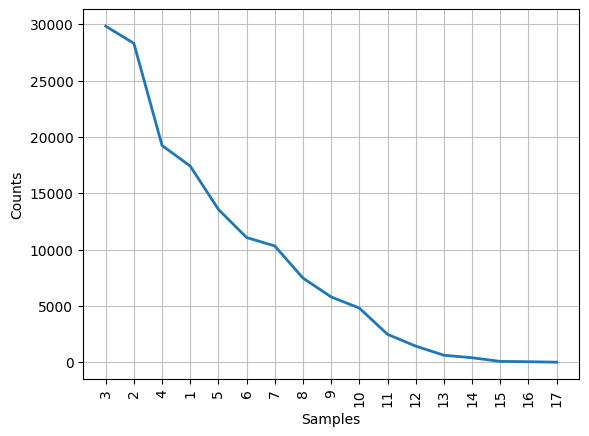

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot() # ...a plot

## **2. Accessing Text Corpora and Lexical Resources**

In [ ]:
# Explore some built-in corpuses

### 2.1. Gutenberg Corpus

In [ ]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
hamlet_words = gutenberg.words('shakespeare-hamlet.txt')
len(hamlet_words) # Number of words in Hamlet

37360

In [ ]:
hamlet_chars = gutenberg.raw('shakespeare-hamlet.txt')
len(hamlet_chars) # Number of chars in Hamlet

162881

In [ ]:
hamlet_sents = gutenberg.sents('shakespeare-hamlet.txt')
len(hamlet_sents) # Number of sentences in Hamlet

3106

In [ ]:
for fileid in gutenberg.fileids(): # Let's calculate for every corpus: (1) average word length (2) average sentence length (3) lexical diversity
  num_chars = len(gutenberg.raw(fileid))
  num_words = len(gutenberg.words(fileid))
  num_sent = len(gutenberg.sents(fileid))
  num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))

  print(round(num_chars/num_words), round(num_words/num_sent), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


### 2.2. Web and Chat Text

In [ ]:
for fileid in webtext.fileids():
  print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [ ]:
nps_chat.fileids()

['10-19-20s_706posts.xml',
 '10-19-30s_705posts.xml',
 '10-19-40s_686posts.xml',
 '10-19-adults_706posts.xml',
 '10-24-40s_706posts.xml',
 '10-26-teens_706posts.xml',
 '11-06-adults_706posts.xml',
 '11-08-20s_705posts.xml',
 '11-08-40s_706posts.xml',
 '11-08-adults_705posts.xml',
 '11-08-teens_706posts.xml',
 '11-09-20s_706posts.xml',
 '11-09-40s_706posts.xml',
 '11-09-adults_706posts.xml',
 '11-09-teens_706posts.xml']

### 2.3. Brown Corpus

In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [ ]:
for cat in brown.categories():
  num_chars = len(brown.raw(categories=cat))
  num_words = len(brown.words(categories=cat))
  num_sents = len(brown.sents(categories=cat))
  print(f"Categories: {cat}. Total words: {num_words}. Average word length: {round(num_chars/num_words)}. ",
        f"Total sentences: {num_sents}. Average sentence length: {round(num_words/num_sents)}")

Categories: adventure. Total words: 69342. Average word length: 8.  Total sentences: 4637. Average sentence length: 15
Categories: belles_lettres. Total words: 173096. Average word length: 9.  Total sentences: 7209. Average sentence length: 24
Categories: editorial. Total words: 61604. Average word length: 9.  Total sentences: 2997. Average sentence length: 21
Categories: fiction. Total words: 68488. Average word length: 8.  Total sentences: 4249. Average sentence length: 16
Categories: government. Total words: 70117. Average word length: 9.  Total sentences: 3032. Average sentence length: 23
Categories: hobbies. Total words: 82345. Average word length: 9.  Total sentences: 4193. Average sentence length: 20
Categories: humor. Total words: 21695. Average word length: 8.  Total sentences: 1053. Average sentence length: 21
Categories: learned. Total words: 181888. Average word length: 9.  Total sentences: 7734. Average sentence length: 24
Categories: lore. Total words: 110299. Average wor

In [ ]:
modals = ['can', 'could', 'may', 'might', 'must', 'will']
genre_word = ((genre, word) for genre in brown.categories() for word in brown.words(categories=genre))
cfd = nltk.ConditionalFreqDist(genre_word)
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could   may might  must  will 
      adventure    46   151     5    58    27    50 
 belles_lettres   246   213   207   113   170   236 
      editorial   121    56    74    39    53   233 
        fiction    37   166     8    44    55    52 
     government   117    38   153    13   102   244 
        hobbies   268    58   131    22    83   264 
          humor    16    30     8     8     9    13 
        learned   365   159   324   128   202   340 
           lore   170   141   165    49    96   175 
        mystery    42   141    13    57    30    20 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        reviews    45    40    45    26    19    58 
        romance    74   193    11    51    45    43 
science_fiction    16    49     4    12     8    16 


### 2.4. Reuters Corpus

In [ ]:
reuters.categories()[:10]

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee']

In [ ]:
stopwords_punctuation = stopwords.words("english") + list(punctuation)
for cat in reuters.categories():
  words_freq = FreqDist(word.lower() for word in reuters.words(categories=cat) if word.lower() not in stopwords_punctuation).most_common(10)
  print(f"Category: {cat}. 10 most common words: {(', '.join([word[0] for word in words_freq]))}")

Category: acq. 10 most common words: said, lt, dlrs, company, mln, shares, inc, pct, corp, offer
Category: alum. 10 most common words: said, aluminium, aluminum, tonnes, mln, 000, new, 1, pct, company
Category: barley. 10 most common words: nil, 87, 1, 2, 0, tonnes, 4, 000, barley, 5
Category: bop. 10 most common words: billion, said, dlrs, mln, deficit, pct, surplus, year, trade, 2
Category: carcass. 10 most common words: said, beef, u, meat, ec, japan, tonnes, would, year, farm
Category: castor-oil. 10 most common words: export, india, new, rbi, products, exchange, annual, said, oil, 000
Category: cocoa. 10 most common words: cocoa, said, buffer, stock, icco, delegates, tonnes, market, rules, international
Category: coconut. 10 most common words: coconut, said, romero, ec, would, philippine, exports, mln, ,", copra
Category: coconut-oil. 10 most common words: said, mln, oil, oils, palm, coconut, tonnes, u, year, production
Category: coffee. 10 most common words: coffee, said, export,

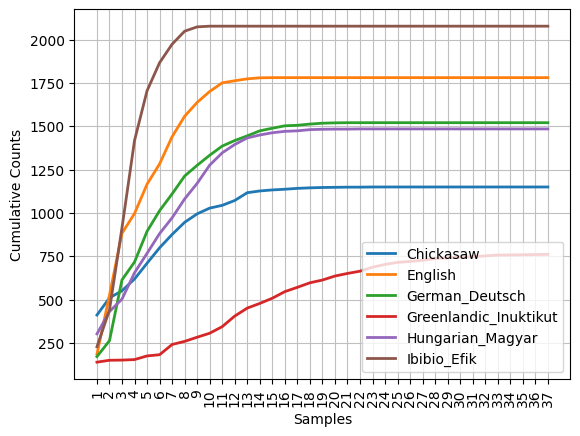

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [ ]:
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
lang_length = ((lang, len(word)) for lang in languages for word in udhr.words(lang + '-Latin1'))
cfd = nltk.ConditionalFreqDist(lang_length)
cfd.plot(cumulative=True)

### 2.5. Loading your own Corpus

In [ ]:
corpus_root = '/content/drive/MyDrive/Colab Notebooks/Data'

In [ ]:
i_robot_corpus = PlaintextCorpusReader(corpus_root, 'Asimov_Isaac_I_Robot.txt')

In [ ]:
stopwords_punctuation = stopwords.words("english") + list(punctuation)
FreqDist((w for w in i_robot_corpus.words() if w.lower() not in stopwords_punctuation)).most_common(10)

[('."', 1162),
 ('?"', 572),
 ('�', 418),
 ('robot', 323),
 ('said', 316),
 (',"', 314),
 ('Powell', 273),
 ('one', 254),
 ('Donovan', 248),
 ('know', 201)]

### 2.6. Names corpus

In [ ]:
names.fileids()

['female.txt', 'male.txt']

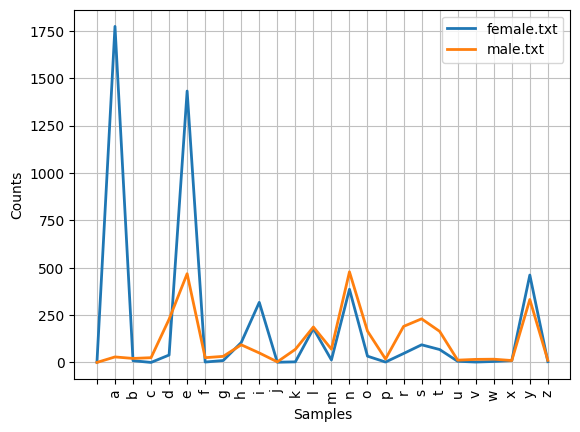

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
file_last_letter = ((fileid, name[-1]) for fileid in names.fileids() for name in names.words(fileid))
cfd = nltk.ConditionalFreqDist(file_last_letter)
cfd.plot()

## **3. Processing Raw Text**

### 3.1. Get simple txt file from url

In [ ]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
len(raw)

1176812

In [ ]:
raw[:100]

'\ufeffThe Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the '

In [ ]:
tokens = word_tokenize(raw)
len(tokens)

257058

In [ ]:
tokens[:10]

['\ufeffThe',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Crime',
 'and',
 'Punishment',
 ',',
 'by']

In [ ]:
text = nltk.Text(tokens)
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Project Gutenberg; Ilya
Petrovitch; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


### 3.2. Dealing with HTML

In [ ]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [ ]:
raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
tokens[:10]

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in']

### 3.3. The NLP Pipeline

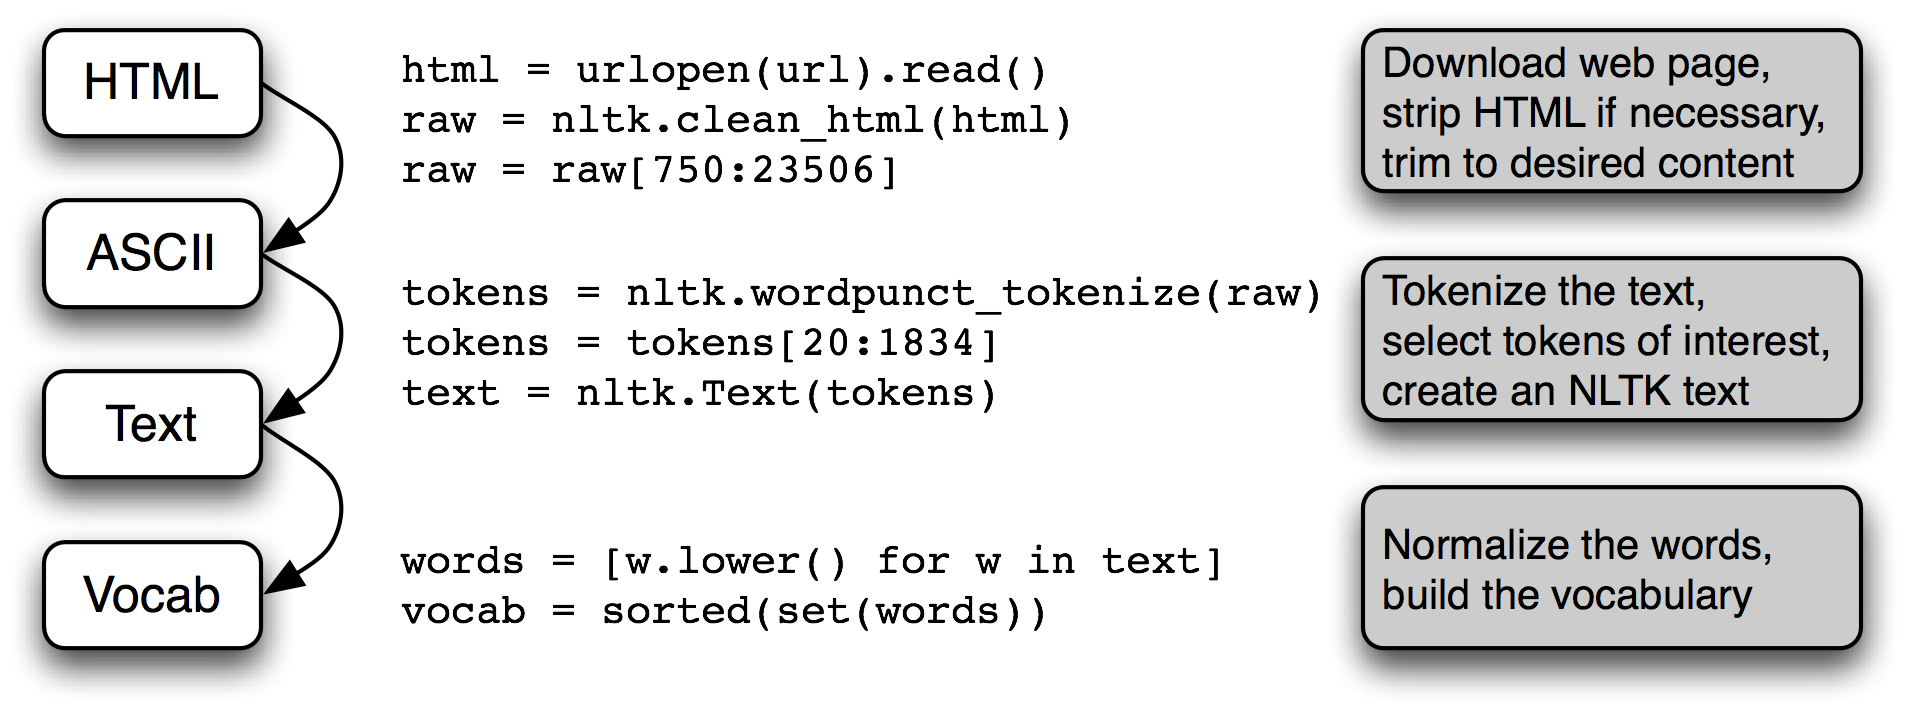

### 3.4. Text Processing with Unicode

Unicode supports over a million characters. Each character is assigned a number, called a code point. In Python, code points are written in the form \uXXXX, where XXXX is the number in 4-digit hexadecimal form.

Within a program, we can manipulate Unicode strings just like normal strings. However, when Unicode characters are stored in files or displayed on a terminal, they must be encoded as a stream of bytes. Some encodings (such as ASCII and Latin-2) use a single byte per code point, so they can only support a small subset of Unicode, enough for a single language. Other encodings (such as UTF-8) use multiple bytes and can represent the full range of Unicode characters.

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Data/prestuplenie-i-nakazanie-rus.txt"

In [ ]:
f = open(path, encoding='UTF-8')
for line in f.readlines()[:10]:
  line = line.strip()
  print(line)
  print(line.encode('unicode_escape'))

Annotation
b'Annotation'

b''

b''
«Преступление и наказание» – гениальный роман, главные темы которого: преступление и наказание, жертвенность и любовь, свобода и гордость человека – обрамлены почти детективным сюжетом.
b'\\xab\\u041f\\u0440\\u0435\\u0441\\u0442\\u0443\\u043f\\u043b\\u0435\\u043d\\u0438\\u0435 \\u0438 \\u043d\\u0430\\u043a\\u0430\\u0437\\u0430\\u043d\\u0438\\u0435\\xbb \\u2013 \\u0433\\u0435\\u043d\\u0438\\u0430\\u043b\\u044c\\u043d\\u044b\\u0439 \\u0440\\u043e\\u043c\\u0430\\u043d, \\u0433\\u043b\\u0430\\u0432\\u043d\\u044b\\u0435 \\u0442\\u0435\\u043c\\u044b \\u043a\\u043e\\u0442\\u043e\\u0440\\u043e\\u0433\\u043e: \\u043f\\u0440\\u0435\\u0441\\u0442\\u0443\\u043f\\u043b\\u0435\\u043d\\u0438\\u0435 \\u0438 \\u043d\\u0430\\u043a\\u0430\\u0437\\u0430\\u043d\\u0438\\u0435, \\u0436\\u0435\\u0440\\u0442\\u0432\\u0435\\u043d\\u043d\\u043e\\u0441\\u0442\\u044c \\u0438 \\u043b\\u044e\\u0431\\u043e\\u0432\\u044c, \\u0441\\u0432\\u043e\\u0431\\u043e\\u0434\\u0430 \\u0438 \\u0

In [ ]:
letter_in_unicode = "\u041f"
letter_in_utf_8_in_byte = letter_in_unicode.encode('UTF-8')
letter_in_utf_8 = letter_in_utf_8_in_byte.decode('UTF-8')
print(f"unicode: {letter_in_unicode.encode('unicode_escape')}, UTF-8 in bytes: {letter_in_utf_8_in_byte}, "
f"UTF-8: {letter_in_utf_8}")

unicode: b'\\u041f', UTF-8 in bytes: b'\xd0\x9f', UTF-8: П


### 3.5. Regular Expressions for Detecting Word Patterns

In [ ]:
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

In [ ]:
[w for w in wordlist if re.search('ed$', w)][:10]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded']

In [ ]:
[w for w in wordlist if re.search('^..j..t..$', w)][:10]

['abjectly',
 'adjuster',
 'dejected',
 'dejectly',
 'injector',
 'majestic',
 'objectee',
 'objector',
 'rejecter',
 'rejector']

In [ ]:
chat_words = sorted(set(w for w in nltk.corpus.nps_chat.words()))

In [ ]:
[w for w in chat_words if re.search('^m+i+n+e+$', w)][:10]

['miiiiiiiiiiiiinnnnnnnnnnneeeeeeeeee',
 'miiiiiinnnnnnnnnneeeeeeee',
 'mine',
 'mmmmmmmmiiiiiiiiinnnnnnnnneeeeeeee']

In [ ]:
[w for w in chat_words if re.search('^[ha]+$', w)][:10]

['a',
 'aaaaaaaaaaaaaaaaa',
 'aaahhhh',
 'ah',
 'ahah',
 'ahahah',
 'ahh',
 'ahhahahaha',
 'ahhh',
 'ahhhh']

In [ ]:
wsj = sorted(set(nltk.corpus.treebank.words()))

In [ ]:
[w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)][:10]

['0.0085', '0.05', '0.1', '0.16', '0.2', '0.25', '0.28', '0.3', '0.4', '0.5']

In [ ]:
[w for w in wsj if re.search('^[A-Z]+\$$', w)][:10]

['C$', 'US$']

In [ ]:
[w for w in wsj if re.search('^[0-9]{4}$', w)][:10]

['1614',
 '1637',
 '1787',
 '1901',
 '1903',
 '1917',
 '1925',
 '1929',
 '1933',
 '1934']

In [ ]:
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)][:10]

['10-day',
 '10-lap',
 '10-year',
 '100-share',
 '12-point',
 '12-year',
 '14-hour',
 '15-day',
 '150-point',
 '190-point']

In [ ]:
[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)][:10]

['black-and-white',
 'bread-and-butter',
 'father-in-law',
 'machine-gun-toting',
 'savings-and-loan']

In [ ]:
[w for w in wsj if re.search('(ed|ing)$', w)][:10]

['62%-owned',
 'Absorbed',
 'According',
 'Adopting',
 'Advanced',
 'Advancing',
 'Alfred',
 'Allied',
 'Annualized',
 'Anything']

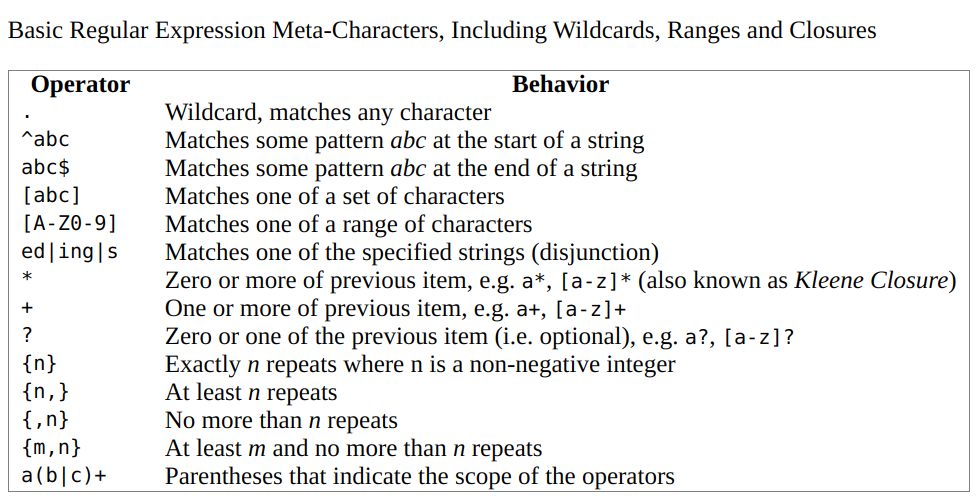

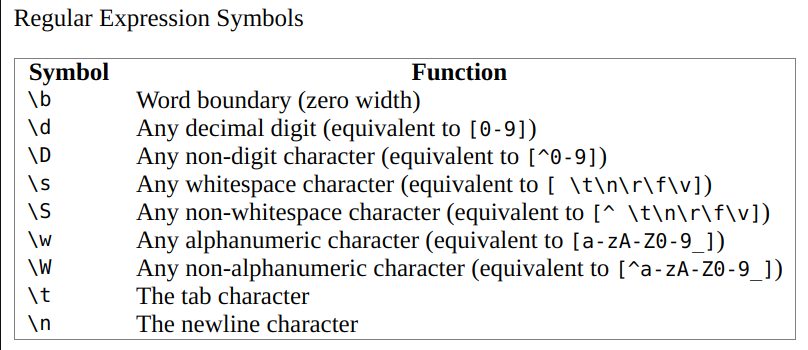

In [ ]:
word = 'supercalifragilisticexpialidocious'
print(re.findall(r'[aeiou]', word))
print(len(re.findall(r'[aeiou]', word)))

['u', 'e', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']
16


In [ ]:
wsj = set(nltk.corpus.treebank.words())

In [ ]:
fd = nltk.FreqDist(vs for word in wsj for vs in re.findall(r'[aeiou]{2,}', word))
fd.most_common(12)

[('io', 549),
 ('ea', 476),
 ('ie', 331),
 ('ou', 329),
 ('ai', 261),
 ('ia', 253),
 ('ee', 217),
 ('oo', 174),
 ('ua', 109),
 ('au', 106),
 ('ue', 105),
 ('ui', 95)]

In [ ]:
[int(n) for n in re.findall(r'[0-9]{2,}', '2009-12-31')]

[2009, 12, 31]

In [ ]:
# The next expression matches initial vowel sequences, final vowel sequences, and all consonants; everything else is ignored.

In [ ]:
regexp = r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
def compress(word):
  pieces = re.findall(regexp, word)
  return ''.join(pieces)

english_udhr = nltk.corpus.udhr.words('English-Latin1')
print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

Unvrsl Dclrtn of Hmn Rghts Prmble Whrs rcgntn of the inhrnt dgnty and
of the eql and inlnble rghts of all mmbrs of the hmn fmly is the fndtn
of frdm , jstce and pce in the wrld , Whrs dsrgrd and cntmpt fr hmn
rghts hve rsltd in brbrs acts whch hve outrgd the cnscnce of mnknd ,
and the advnt of a wrld in whch hmn bngs shll enjy frdm of spch and


In [ ]:
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>")

monied; nervous; dangerous; white; white; white; pious; queer; good;
mature; white; Cape; great; wise; wise; butterless; white; fiendish;
pale; furious; better; certain; complete; dismasted; younger; brave;
brave; brave; brave


In [ ]:
nltk.re_show(r'\sa\s[^\s]*\sman\s{1}', 'bla bla bla a dangerous man bla bla bla')

bla bla bla{ a dangerous man }bla bla bla


### 3.6. Normalizing Text

In [ ]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords is no basis for a system of government.
Supreme executive power derives from a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)

Stemmers

Stemming is not a well-defined process, and we typically pick the stemmer that best suits the application we have in mind. The Porter Stemmer is a good choice if you are indexing some texts and want to support search using alternative forms of words

In [ ]:
porter = nltk.PorterStemmer()
print([porter.stem(t) for t in tokens])

['denni', ':', 'listen', ',', 'strang', 'women', 'lie', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'basi', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'power', 'deriv', 'from', 'a', 'mandat', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcic', 'aquat', 'ceremoni', '.']


In [ ]:
lancaster = nltk.LancasterStemmer()
print([lancaster.stem(t) for t in tokens])

['den', ':', 'list', ',', 'strange', 'wom', 'lying', 'in', 'pond', 'distribut', 'sword', 'is', 'no', 'bas', 'for', 'a', 'system', 'of', 'govern', '.', 'suprem', 'execut', 'pow', 'der', 'from', 'a', 'mand', 'from', 'the', 'mass', ',', 'not', 'from', 'som', 'farc', 'aqu', 'ceremony', '.']


In [ ]:
snowball = nltk.stem.SnowballStemmer(language='russian')
rus_text = "Мы пошли гулять в ночи и кучка собак была там"
rus_tokens = word_tokenize(rus_text)
print([snowball.stem(t) for t in rus_tokens])

['мы', 'пошл', 'гуля', 'в', 'ноч', 'и', 'кучк', 'собак', 'был', 'там']


Lemmatization

In [ ]:
wnl = nltk.WordNetLemmatizer()
print([wnl.lemmatize(t) for t in tokens])

['DENNIS', ':', 'Listen', ',', 'strange', 'woman', 'lying', 'in', 'pond', 'distributing', 'sword', 'is', 'no', 'basis', 'for', 'a', 'system', 'of', 'government', '.', 'Supreme', 'executive', 'power', 'derives', 'from', 'a', 'mandate', 'from', 'the', 'mass', ',', 'not', 'from', 'some', 'farcical', 'aquatic', 'ceremony', '.']


### 3.7. Regular Expressions for Tokenizing Text

Simple Approaches to Tokenization


In [ ]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
 though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
 well without--Maybe it's always pepper that makes people hot-tempered,'"""

In [ ]:
print(re.split(r'\s+', raw))

["'When", "I'M", 'a', "Duchess,'", 'she', 'said', 'to', 'herself,', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though),', "'I", "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL.', 'Soup', 'does', 'very', 'well', 'without--Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', "hot-tempered,'"]


In [ ]:
print(re.split(r'\W+', raw))

['', 'When', 'I', 'M', 'a', 'Duchess', 'she', 'said', 'to', 'herself', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', 'I', 'won', 't', 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', 'Soup', 'does', 'very', 'well', 'without', 'Maybe', 'it', 's', 'always', 'pepper', 'that', 'makes', 'people', 'hot', 'tempered', '']


In [ ]:
print(re.findall(r'\w+|\S\w*', raw))

["'When", 'I', "'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'I", 'won', "'t", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '-', '-Maybe', 'it', "'s", 'always', 'pepper', 'that', 'makes', 'people', 'hot', '-tempered', ',', "'"]


In [ ]:
print(re.findall(r"\w+(?:[-']\w+)*|'|[-.(]+|\S\w*", raw))

["'", 'When', "I'M", 'a', 'Duchess', ',', "'", 'she', 'said', 'to', 'herself', ',', '(', 'not', 'in', 'a', 'very', 'hopeful', 'tone', 'though', ')', ',', "'", 'I', "won't", 'have', 'any', 'pepper', 'in', 'my', 'kitchen', 'AT', 'ALL', '.', 'Soup', 'does', 'very', 'well', 'without', '--', 'Maybe', "it's", 'always', 'pepper', 'that', 'makes', 'people', 'hot-tempered', ',', "'"]


NLTK's Regular Expression Tokenizer

In [ ]:
text = 'That U.S.A. poster-print costs $12.40...'
pattern = r'''(?x)     # set flag to allow verbose regexps
     (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
     | \w+(?:-\w+)*       # words with optional internal hyphens
     | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
     | \.\.\.             # ellipsis
     | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
      '''
nltk.regexp_tokenize(text, pattern)

['That', 'U.S.A.', 'poster-print', 'costs', '$12.40', '...']

### 3.8. Segmentation

Sentence Segmentation

In [ ]:
text = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents = nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

['"Nonsense!"',
 'said Gregory, who was very rational when anyone else\nattempted paradox.',
 '"Why do all the clerks and navvies in the\n'
 'railway trains look so sad and tired, so very sad and tired?',
 'I will\ntell you.',
 'It is because they know that the train is going right.',
 'It\n'
 'is because they know that whatever place they have taken a ticket\n'
 'for that place they will reach.',
 'It is because after they have\n'
 'passed Sloane Square they know that the next station must be\n'
 'Victoria, and nothing but Victoria.',
 'Oh, their wild rapture!',
 'oh,\n'
 'their eyes like stars and their souls again in Eden, if the next\n'
 'station were unaccountably Baker Street!"',
 '"It is you who are unpoetical," replied the poet Syme.']


In [ ]:
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

In [ ]:
sent_detector.tokenize(text.strip())[:10]

['[The Man Who Was Thursday by G. K. Chesterton 1908]\n\nTo Edmund Clerihew Bentley\n\nA cloud was on the mind of men, and wailing went the weather,\nYea, a sick cloud upon the soul when we were boys together.',
 'Science announced nonentity and art admired decay;\nThe world was old and ended: but you and I were gay;\nRound us in antic order their crippled vices came--\nLust that had lost its laughter, fear that had lost its shame.',
 'Like the white lock of Whistler, that lit our aimless gloom,\nMen showed their own white feather as proudly as a plume.',
 'Life was a fly that faded, and death a drone that stung;\nThe world was very old indeed when you and I were young.',
 'They twisted even decent sin to shapes not to be named:\nMen were ashamed of honour; but we were not ashamed.',
 'Weak if we were and foolish, not thus we failed, not thus;\nWhen that black Baal blocked the heavens he had no hymns from us\nChildren we were--our forts of sand were even as weak as eve,\nHigh as they w

## **5. Categorizing and Tagging Words**

### 5.1. Using a Tagger

In [ ]:
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [ ]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [ ]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [ ]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [ ]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [ ]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [ ]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


### 5.2. Tagged Corpora

Representing Tagged Tokens

In [ ]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
print([nltk.tag.str2tuple(t) for t in sent.split()])

[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ('and', 'CC'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('purchasing', 'VBG'), ('departments', 'NNS'), ('which', 'WDT'), ('it', 'PPS'), ('said', 'VBD'), ('``', '``'), ('ARE', 'BER'), ('well', 'QL'), ('operated', 'VBN'), ('and', 'CC'), ('follow', 'VB'), ('generally', 'RB'), ('accepted', 'VBN'), ('practices', 'NNS'), ('which', 'WDT'), ('inure', 'VB'), ('to', 'IN'), ('the', 'AT'), ('best', 'JJT'), ('interest', 'NN'), ('of', 'IN'), ('both', 'ABX'), ('governments', 'NNS'), ("''", "''"), ('.', '.')]


Reading Tagged Corpora

In [ ]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

A Universal Part-of-Speech Tagset
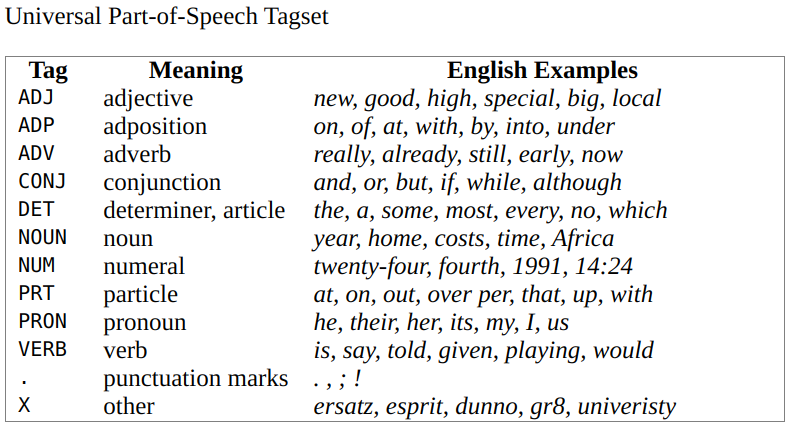

In [ ]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

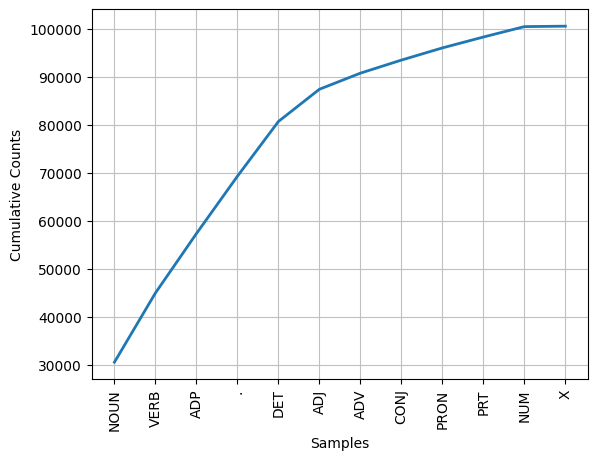

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [ ]:
tag_fd.plot(cumulative=True)

Nouns

In [ ]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
print([tag for (tag, _) in fdist.most_common()])

['NOUN', 'DET', 'ADJ', 'ADP', '.', 'VERB', 'CONJ', 'NUM', 'ADV', 'PRT', 'PRON', 'X']


Verbs

In [ ]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
verb_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'VERB']
fdist = nltk.FreqDist(verb_preceders)
print([tag for (tag, _) in fdist.most_common()])

['NOUN', 'VERB', 'PRON', 'PRT', '.', 'ADV', 'DET', 'CONJ', 'ADP', 'ADJ', 'NUM', 'X']


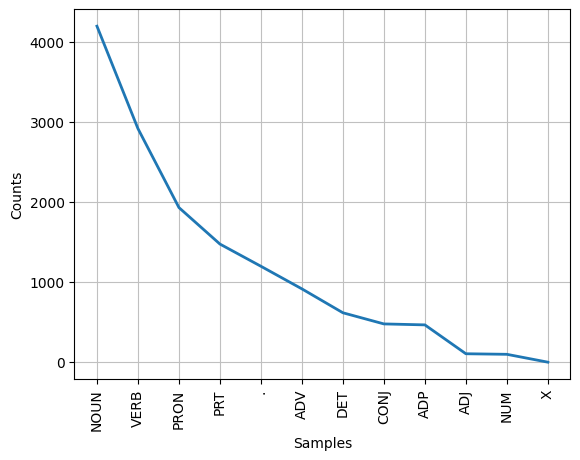

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot()

Adjectives

In [ ]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
adj_followers = [b[1] for (a, b) in word_tag_pairs if a[1] == 'ADJ']
fdist = nltk.FreqDist(adj_followers)
print([tag for (tag, _) in fdist.most_common()])

['NOUN', 'ADP', '.', 'ADJ', 'CONJ', 'NUM', 'PRT', 'VERB', 'ADV', 'DET', 'PRON', 'X']


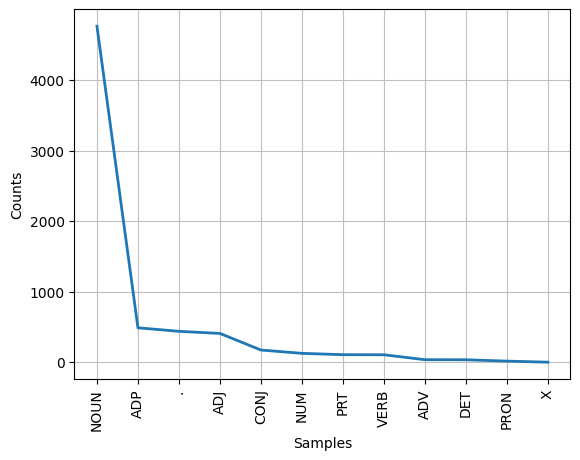

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot()

Unsimplified Tags

In [ ]:
def findtags(tag_prefix, tagged_text):
  cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text if tag.startswith(tag_prefix))
  return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [ ]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))

In [ ]:
for tag in sorted(tagdict):
  print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

Exploring Tagged Corpora

In [ ]:
brown_learned_text = brown.words(categories='learned')
print(sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often')))

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming', 'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', 'classified', 'colorful', 'composed', 'contain', 'differed', 'difficult', 'encountered', 'enough', 'equate', 'extremely', 'found', 'happens', 'have', 'ignored', 'in', 'involved', 'more', 'needed', 'nightly', 'observed', 'of', 'on', 'out', 'quite', 'represent', 'responsible', 'revamped', 'seclude', 'set', 'shortened', 'sing', 'sounded', 'stated', 'still', 'sung', 'supported', 'than', 'to', 'when', 'work']


In [ ]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [ ]:
def process(sentence):
  for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
    if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
      print(w1, w2, w3)

In [ ]:
for tagged_sent in brown.tagged_sents()[:100]:
  process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see


### 5.3. Automatic Tagging

In [ ]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

The Default Tagger

In [ ]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [ ]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [ ]:
default_tagger.accuracy(brown_tagged_sents)

0.13089484257215028

The Regular Expression Tagger

In [ ]:
patterns = [
    (r'.*ing$', 'VBG'),                # gerunds
    (r'.*ed$', 'VBD'),                 # simple past
    (r'.*es$', 'VBZ'),                 # 3rd singular present
    (r'.*ould$', 'MD'),                # modals
    (r'.*\'s$', 'NN$'),                # possessive nouns
    (r'.*s$', 'NNS'),                  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                      # nouns (default)
    ]
regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown_sents[3]))

[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'), ('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``', 'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]


In [ ]:
regexp_tagger.accuracy(brown_tagged_sents)

0.20186168625812995

 The Lookup Tagger

In [ ]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.accuracy(brown_tagged_sents)

0.45578495136941344

In [ ]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))
baseline_tagger.accuracy(brown_tagged_sents)

0.5817769556656125

In [ ]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.accuracy(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

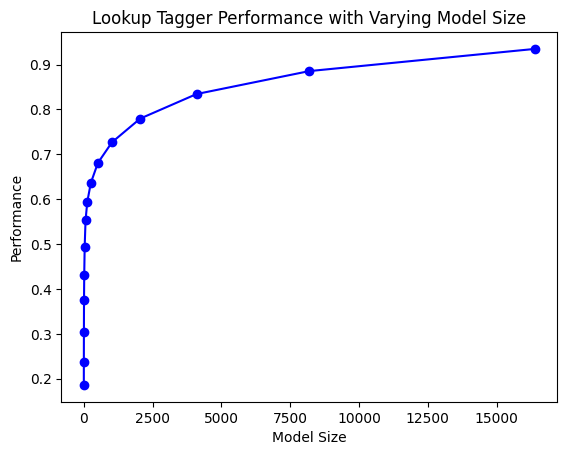

In [ ]:
display()

### 5.4. N-Gram Tagging
Unigram Tagging

In [ ]:
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.accuracy(brown_tagged_sents)

0.9349006503968017

In [ ]:
brown_fiction_tagged_sents = brown.tagged_sents(categories='fiction')
brown_fiction_sents = brown.sents(categories='fiction')
unigram_tagger = nltk.UnigramTagger(brown_fiction_tagged_sents)
unigram_tagger.accuracy(brown_tagged_sents)

0.6960041370805736

Separating the Training and Testing Data

In [ ]:
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.accuracy(test_sents)

0.8121200039868434

General N-Gram Tagging

In [ ]:
bigram_tagger = nltk.BigramTagger(train_sents)
print(bigram_tagger.tag(brown_sents[2007]))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


In [ ]:
unseen_sent = brown_sents[4203]
print(bigram_tagger.tag(unseen_sent))

[('The', 'AT'), ('population', 'NN'), ('of', 'IN'), ('the', 'AT'), ('Congo', 'NP'), ('is', 'BEZ'), ('13.5', None), ('million', None), (',', None), ('divided', None), ('into', None), ('at', None), ('least', None), ('seven', None), ('major', None), ('``', None), ('culture', None), ('clusters', None), ("''", None), ('and', None), ('innumerable', None), ('tribes', None), ('speaking', None), ('400', None), ('separate', None), ('dialects', None), ('.', None)]


In [ ]:
bigram_tagger.accuracy(test_sents)

0.10206319146815508

Combining Taggers

In [ ]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.accuracy(test_sents)

0.8452108043456593

5.5. Transformation-Based Tagging

In [ ]:
brill_demo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8358
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

5.6. Exercises

20. Write code to search the Brown Corpus for particular words and phrases according to tags, to answer the following questions:
* Produce an alphabetically sorted list of the distinct words tagged as MD.
* Identify words that can be plural nouns or third person singular verbs (e.g. deals, flies).
* Identify three-word prepositional phrases of the form IN + DET + NN (eg. in the lab).
* What is the ratio of masculine to feminine pronouns?

24. How serious is the sparse data problem? Investigate the performance of n-gram taggers as n increases from 1 to 6. Tabulate the accuracy score. Estimate the training data required for these taggers, assuming a vocabulary size of 105 and a tagset size of 102.

33. Write code that builds a dictionary of dictionaries of sets. Use it to store the set of POS tags that can follow a given word having a given POS tag, i.e. word_i → tag_i → tag_i+1.

34. There are 264 distinct words in the Brown Corpus having exactly three possible tags.
*   Print a table with the integers 1..10 in one column, and the number of distinct words in the corpus having 1..10 distinct tags in the other column.
*   For the word with the greatest number of distinct tags, print out sentences from the corpus containing the word, one for each possible tag.

35. Write a program to classify contexts involving the word must according to the tag of the following word. Can this be used to discriminate between the epistemic and deontic uses of must?

36. Create a regular expression tagger and various unigram and n-gram taggers, incorporating backoff, and train them on part of the Brown corpus.
* Create three different combinations of the taggers. Test the accuracy of each combined tagger. Which combination works best?
* Try varying the size of the training corpus. How does it affect your results?

37. Our approach for tagging an unknown word has been to consider the letters of the word (using RegexpTagger()), or to ignore the word altogether and tag it as a noun (using nltk.DefaultTagger()). These methods will not do well for texts having new words that are not nouns. Consider the sentence I like to blog on Kim's blog. If blog is a new word, then looking at the previous tag (TO versus NP$) would probably be helpful. I.e. we need a default tagger that is sensitive to the preceding tag.
* Create a new kind of unigram tagger that looks at the tag of the previous word, and ignores the current word. (The best way to do this is to modify the source code for UnigramTagger(), which presumes knowledge of object-oriented programming in Python.)
* Add this tagger to the sequence of backoff taggers (including ordinary trigram and bigram taggers that look at words), right before the usual default tagger.
* Evaluate the contribution of this new unigram tagger.

39. Use some of the estimation techniques in *nltk.probability*, such as Lidstone or Laplace estimation, to develop a statistical tagger that does a better job than n-gram backoff taggers in cases where contexts encountered during testing were not seen during training.

## **6. Learning to Classify Text**
### 6.1. Supervised Classification